### TEXT EMOTION DETECTION

In [63]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !ip install matplotlib
# !pip install neattext
# !pip install scikit-learn
# !pip install joblib

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import neattext.functions as nfx
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

### Load Dataset

In [8]:
df = pd.read_csv("emotion_dataset_raw.csv")
print("Dataset successfully loaded!")

Dataset successfully loaded!


In [9]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [10]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

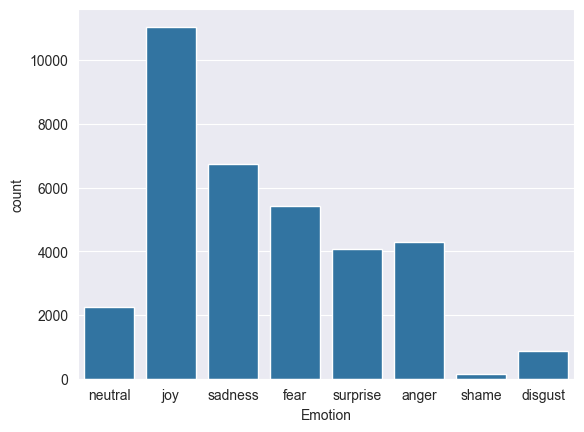

In [11]:
sns.countplot(x='Emotion',data=df)

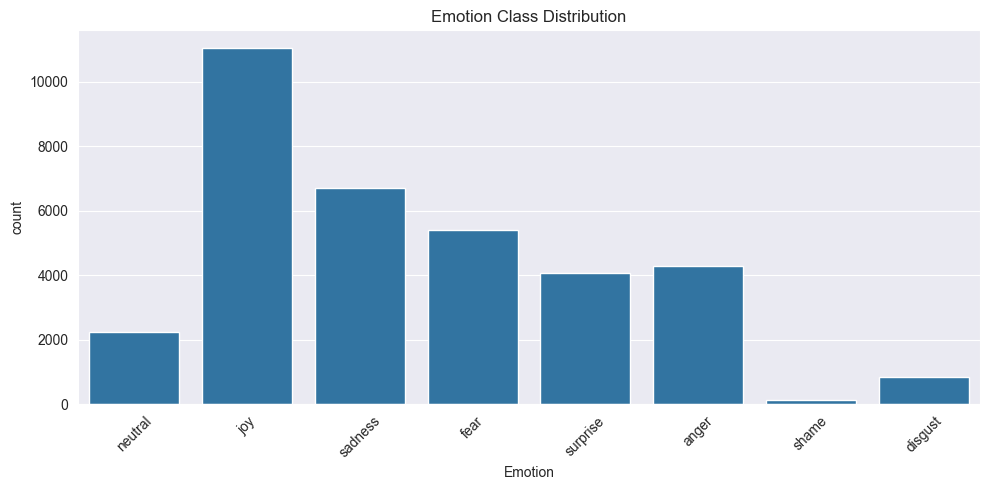

In [12]:
#Visualize Class Distribution
plt.figure(figsize=(10,5))
sns.countplot(x='Emotion', data=df)
plt.xticks(rotation=45)
plt.title("Emotion Class Distribution")
plt.tight_layout()
plt.show()

### Data pre-processing

In [13]:
# Clean Text
df['Clean_Text'] = (
    df['Text']
    .apply(nfx.remove_userhandles)
    .apply(nfx.remove_stopwords)
    .apply(nfx.remove_punctuations)  # added: removes punctuation
    .apply(nfx.remove_special_characters)  # added: removes emojis, etc.
)

In [14]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [15]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e b...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,anger,A man robbed me today .,man robbed today
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY Losing YOU


### Splitting data into input variables and target variable

x: Features are the attributes and variables extracted from the dataset. These extracted features are used as inputs to the model during training.

y: Labels are the output or the target variable.

In [16]:
x = df['Clean_Text']
y = df['Emotion']

### Splitting data into train and test set

We need to split our dataset into a train set and test set. The model will learn from the train set. We will use the test set to evaluate the model performance and measure the model’s knowledge capability.

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### Define and Train Models

In [18]:
models = {
    "Logistic Regression": Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', LogisticRegression(max_iter=1000))
    ]),
    "SVM (RBF Kernel)": Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', SVC(kernel='rbf', C=10, probability=True))
    ]),
    "Random Forest": Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', RandomForestClassifier(n_estimators=100))
    ]),
}

### 6. Evaluate Models

In [19]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.6020
              precision    recall  f1-score   support

       anger       0.65      0.53      0.58      1283
     disgust       0.70      0.05      0.09       292
        fear       0.75      0.62      0.68      1645
         joy       0.55      0.82      0.66      3311
     neutral       0.67      0.32      0.43       675
     sadness       0.59      0.58      0.58      2015
       shame       0.69      0.25      0.37        36
    surprise       0.60      0.38      0.46      1181

    accuracy                           0.60     10438
   macro avg       0.65      0.44      0.48     10438
weighted avg       0.62      0.60      0.59     10438


SVM (RBF Kernel) Accuracy: 0.6348
              precision    recall  f1-score   support

       anger       0.63      0.56      0.60      1283
     disgust       0.73      0.11      0.19       292
        fear       0.79      0.66      0.72      1645
         joy       0.59      0.82      0.68      3311
     

### Save Best Model

In [20]:
best_model = models["Logistic Regression"]  # Replace with your best-performing model
joblib.dump(best_model, "text_emotion_model.pkl")
print("\nModel saved as 'text_emotion_model.pkl'")


Model saved as 'text_emotion_model.pkl'
